In [14]:
import pandas as pd
import numpy as np
import matplotlib
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Loading data as a dataframe.

In [15]:
san_francisco = pd.read_csv("./datasets/Flood_Health_Vulnerability.csv")
san_francisco = san_francisco[(np.abs(stats.zscore(san_francisco)) < 3).all(axis=1)] #Gets rid of outliers
san_francisco.head()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,FloodHealthIndex_Quintiles
1,60750201001,0.079893,0.124,0.651000,0.509706,0.724000,0.232,7.83292,0.000000,0.020516,16.0115,62.0535,10.5741,0.238,10.24060,15.8921,0.522000,83.4860,5
3,60750178021,0.084215,0.088,0.584000,0.327362,0.843000,0.119,-5.96629,0.064579,0.024166,14.9856,54.0699,9.5802,0.229,7.04366,19.2683,0.427000,82.4925,5
6,60750201003,0.079893,0.124,0.651000,0.509706,0.724000,0.232,5.81684,0.000000,0.028468,15.9985,61.8836,10.5438,0.238,9.68738,3.2195,0.522000,81.5060,5
9,60750201002,0.079893,0.124,0.650999,0.509706,0.724001,0.232,13.91790,0.000000,0.013759,16.0125,62.0500,10.5693,0.238,11.57780,3.2195,0.522001,80.8327,5
15,60750176015,0.109834,0.141,0.733000,0.550862,0.806000,0.117,10.06420,0.000000,0.004025,16.0068,62.0689,10.5959,0.227,6.98324,19.2683,0.609000,79.1461,5


Basic Statistics

In [16]:
san_francisco.describe().drop("count", axis=0)

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex,FloodHealthIndex_Quintiles
mean,6.075026e+10,0.130563,0.137482,0.544521,0.244480,0.886913,0.109916,134.64670,0.002717,0.005756,7.528631,18.097494,4.222185,0.094565,5.571640,3.726003,0.338921,47.167092,2.783567
std,1.127311e+05,0.049021,0.044716,0.205166,0.119968,0.086869,0.079790,97.14176,0.016904,0.008666,3.902217,13.803743,2.498270,0.037506,3.571443,4.710422,0.141094,11.772034,1.344799
min,6.075010e+10,0.009804,0.029776,0.128998,0.057373,0.593000,0.000000,-9.22917,0.000000,0.000000,0.000000,0.051100,0.000000,0.023084,0.000000,0.260200,0.064521,19.293200,1.000000
25%,6.075017e+10,0.089839,0.103000,0.386501,0.163074,0.828000,0.040500,54.76360,0.000000,0.000813,4.300000,8.633050,2.710900,0.074000,2.922535,0.520700,0.227000,38.602950,2.000000
50%,6.075025e+10,0.134989,0.139000,0.541000,0.225464,0.909000,0.100000,129.98200,0.000000,0.002516,6.400000,13.869000,3.651300,0.091000,4.764250,2.158900,0.317999,45.953100,3.000000
75%,6.075033e+10,0.170018,0.171000,0.675500,0.292193,0.958000,0.175000,194.00900,0.000000,0.006580,9.902050,21.476050,5.057700,0.111000,7.078370,4.598100,0.437000,54.033100,4.000000
max,6.075062e+10,0.295794,0.270000,0.981456,0.678177,1.000999,0.345000,433.66900,0.159217,0.048153,20.995600,63.750000,14.533600,0.238000,24.300000,19.268300,0.691000,83.486000,5.000000


Exploration with Flood Index Quintiles as a category

In [17]:
san_francisco.groupby("FloodHealthIndex_Quintiles").min()

,Census Blockgroup,Children,Elderly,NonWhite,Poverty,Education,English,Elevation,SeaLevelRise,Precipitation,Diabetes,MentalHealth,Asthma,Disability,HousingViolations,Homeless,LivAlone,FloodHealthIndex
FloodHealthIndex_Quintiles,,,,,,,,,,,,,,,,,,
1,60750128002,0.044489,0.029776,0.186000,0.057373,0.775194,0.000000,-6.75712,0.0,0.0,0.0000,0.0511,0.0000,0.024000,0.193517,0.2606,0.139000,19.2932
2,60750126022,0.044489,0.050000,0.128998,0.057373,0.705228,0.000000,-7.20480,0.0,0.0,0.0000,5.1498,0.0000,0.024000,0.000000,0.2606,0.064521,37.8997
3,60750102002,0.028313,0.050000,0.155000,0.071228,0.686715,0.006000,-1.31835,0.0,0.0,0.0000,5.1600,0.0000,0.037000,0.340483,0.2606,0.065000,44.2862
4,60750102001,0.009804,0.040396,0.155000,0.069069,0.660000,0.009882,-9.22917,0.0,0.0,3.2000,6.2100,1.9236,0.023084,0.190422,0.2606,0.152000,51.2730
5,60750101002,0.009804,0.056957,0.412000,0.129087,0.593000,0.036000,-7.00000,0.0,0.0,3.4437,8.9413,2.2718,0.066000,0.237586,0.2602,0.087000,61.2794


Scatterplots of Demographic Factors against Flood Health Index

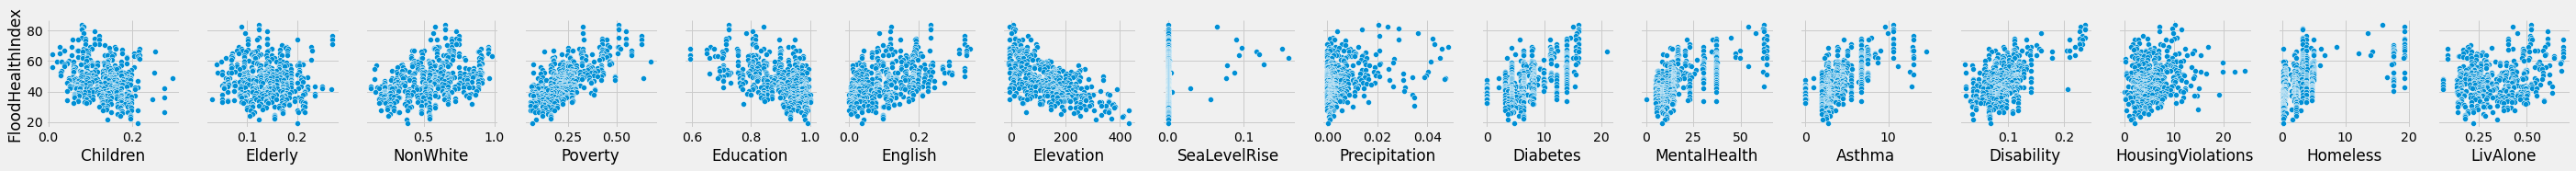

In [18]:
import seaborn as sns
pp = sns.PairGrid(data=san_francisco,
                  y_vars=['FloodHealthIndex'],
                  x_vars=list(san_francisco.columns)[1:-2])
pp.map(sns.scatterplot)

Correlating Variables to FHI

In [19]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
columns = list(san_francisco.columns)[1:-2]
fhi = san_francisco[['FloodHealthIndex']]

correlationType  = dict()
significant_metrics = {}
for column in columns:
    non_linear_corr, p1 = spearmanr(fhi, san_francisco[column])
    linear_corr, p2 = pearsonr(san_francisco[column], fhi)
    if abs(non_linear_corr) > abs(linear_corr[0]):
        larger_corr = non_linear_corr
        correlationType.update({column: "nonlinear"})
    else:
        larger_corr = linear_corr[0]
        correlationType.update({column: "linear"})
    
    if abs(larger_corr) >= .5:
        significant_metrics[column] = larger_corr

    
    print(f"{column}: {larger_corr} ({correlationType[column]})")
print(significant_metrics)




Children: -0.2857895487684717 (linear)
Elderly: -0.07932683793647982 (nonlinear)
NonWhite: 0.42777884442768427 (nonlinear)
Poverty: 0.6940349145675028 (linear)
Education: -0.5185598506634179 (linear)
English: 0.48954459987910764 (nonlinear)
Elevation: -0.6248862353664248 (linear)
SeaLevelRise: 0.20161734735146153 (linear)
Precipitation: 0.30381718961991616 (linear)
Diabetes: 0.5999321498483324 (linear)
MentalHealth: 0.633009433173236 (linear)
Asthma: 0.641611209836375 (linear)
Disability: 0.5759663051153814 (linear)
HousingViolations: 0.22729048797961451 (linear)
Homeless: 0.5297459087845907 (nonlinear)
LivAlone: 0.2508361644595812 (linear)
{}
